<a href="https://colab.research.google.com/github/andrewbeckster/Smoking-and-Tobacco-Analysis/blob/main/Smoking_and_Tobacco_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Smoking and Tobacco Consumption Project --Andrew Beck


Using datasets found from the [California Open Data Portal](https://data.ca.gov/dataset/adult-cigarette-and-tobacco-use-prevalence/resource/9d1365cc-8558-4da0-9f01-326b51d83d0c) and [The CDC](https://chronicdata.cdc.gov/Policy/Adult-Tobacco-Consumption-In-The-U-S-2000-Present/rnvb-cpxx/data) I perform an independent T-Test to see if there is a significant difference in smoking rates between male and female smokers. I also test the Pearson correlation coefficient between the United States population and cigarette consumption

### Import Libraries

In [74]:
!pip install opendatasets
import pandas as pd
import sqlalchemy
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Load Data

In [75]:
#Data for Hypothesis 1 (California Open Data Portal)
smoking_df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/adult-smoking-prevalence.csv')
#Data for Hypothesis 2 (CDC)
tobacco_df1 = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/Adult_Tobacco_Consumption_In_The_U.S.__2000-Present.csv')


In [76]:
female_df = smoking_df.loc[(smoking_df['GENDER']=='Female')]
male_df = smoking_df[(smoking_df['GENDER'] == 'Male')]
gender_df = smoking_df[(smoking_df['GENDER'])!= 'Total']
male_df2 = male_df[(male_df['YEAR']>= 2000)]
female_df2 = female_df[(female_df['YEAR']>= 2000)]
gender_df2 = gender_df[(gender_df['YEAR']>= 2000)]

In [77]:
tobacco_df1['Population'] = tobacco_df1['Population'].astype(int)
tobacco_df1['Total'] = tobacco_df1['Total'].astype(int)

In [78]:
tobacco_df=tobacco_df1.loc[(tobacco_df1['Measure'] == 'Cigarettes'),
                    ['Year','Population', 'Total']]

In [79]:
capita_df=tobacco_df1.loc[(tobacco_df1['Submeasure'] == 'Total Combustible Tobacco'),
                    ['Year','Population', 'Total Per Capita']]

##Hypothesis 1

My first Hypothesis is that there is a significant statistical difference between male and female smoking rates. Tested at the 95% confidence level, there should be a p value less than .05.

In [80]:
stats.ttest_ind(male_df['PERCENT'], female_df['PERCENT'])

Ttest_indResult(statistic=5.029011363941247, pvalue=3.648713070998553e-06)

Text(0.5, 0, 'Gender')

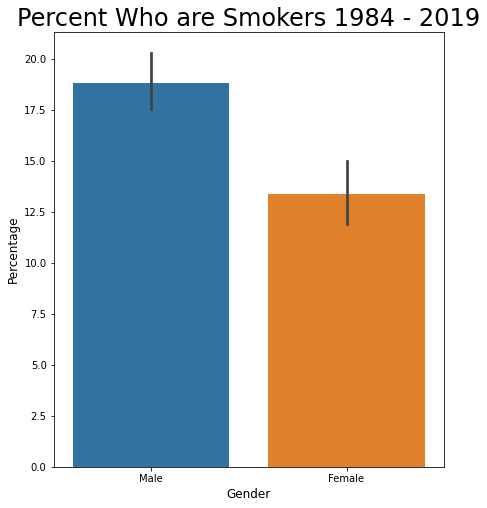

In [81]:
plt.figure(figsize=(7, 8))
ax = sns.barplot(x='GENDER', y='PERCENT', data=gender_df)
ax.set_title('Percent Who are Smokers 1984 - 2019', size = 24)
ax.set_ylabel("Percentage", size = 12)
ax.set_xlabel("Gender", size = 12)

In [82]:
stats.ttest_ind(male_df2['PERCENT'], female_df2['PERCENT'])

Ttest_indResult(statistic=8.456794995378859, pvalue=2.8962716694396594e-10)

Text(0.5, 0, 'Gender')

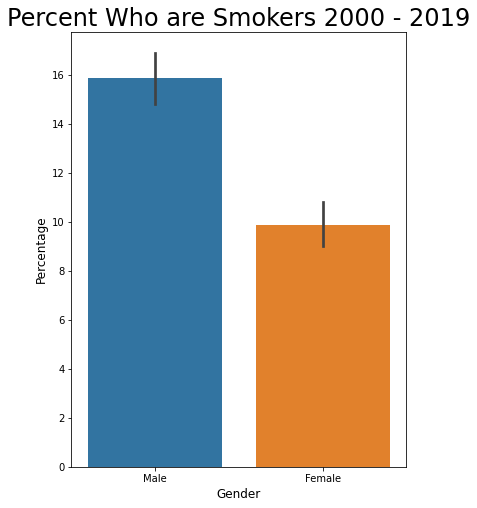

In [83]:
plt.figure(figsize=(6, 8))
ax = sns.barplot(x='GENDER', y='PERCENT', data=gender_df2)
ax.set_title('Percent Who are Smokers 2000 - 2019', size = 24)
ax.set_ylabel("Percentage", size = 12)
ax.set_xlabel("Gender", size = 12)

##Findings of Hypothesis 1
The first T-test of smokers from 1984 - 2019 shows a significant difference betweeen male and female smokers,  with p < . 01. The second T-test of data from  smokers since the year 2000 also has similiar results.  The barplot shows males are signficiantly more likely to be smokers than females. **Supports The Hypothesis**

##Hypothesis 2
There will be no correlation between Population Size and Tobacco Consumption. Tobacco consumption is measured in cigarettes and cigarette euqivalents

Text(0, 0.5, 'Cigarretes Per capita')

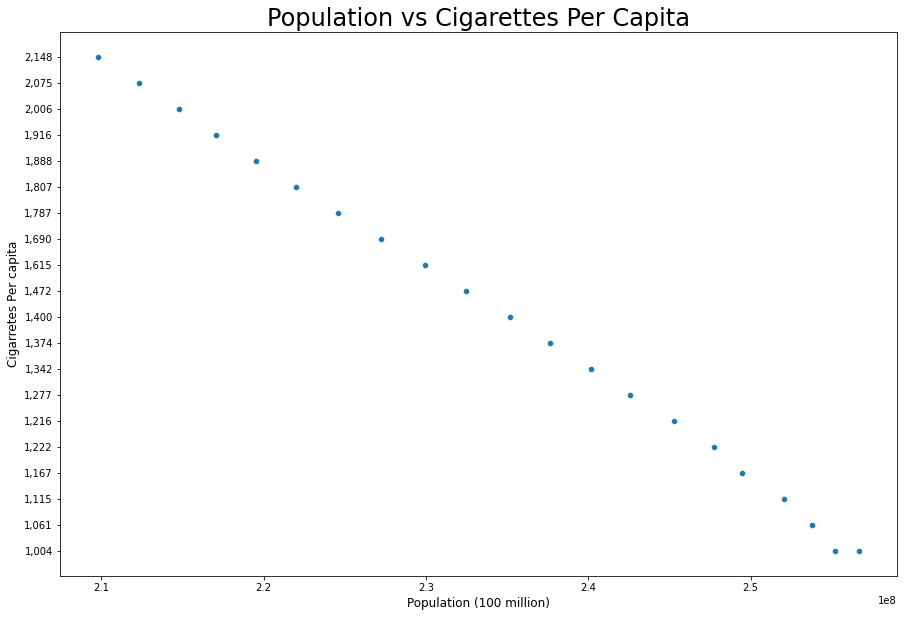

In [84]:
plt.figure(figsize = (15, 10))
ax= sns.scatterplot(y='Total Per Capita', x='Population', data=capita_df)
ax.set_title("Population vs Cigarettes Per Capita", size = 24)
ax.set_xlabel( "Population (100 million)" , size = 12 )
ax.set_ylabel("Cigarretes Per capita", size = 12)

Text(0, 0.5, 'Total Combustible Tobacco (in 10 billion cigarette equivalents)')

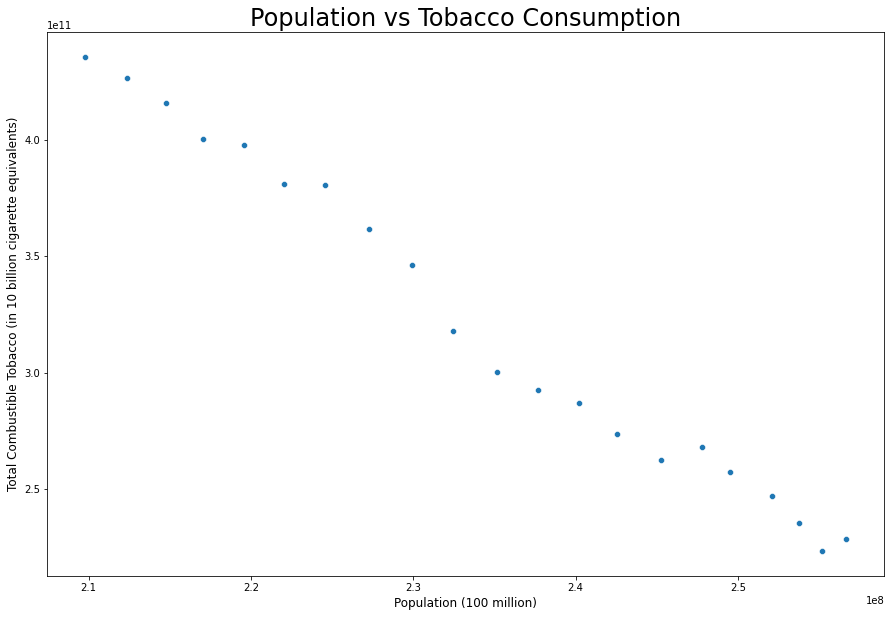

In [86]:
plt.figure(figsize = (15, 10))
ax= sns.scatterplot(y='Total', x='Population', data=tobacco_df)
ax.set_title("Population vs Tobacco Consumption", size = 24)
ax.set_xlabel( "Population (100 million)" , size = 12 )
ax.set_ylabel("Total Combustible Tobacco (in 10 billion cigarette equivalents)", size = 12)

In [87]:
stats.pearsonr(tobacco_df['Population'], tobacco_df['Total'])

(-0.9925149362870732, 8.109128187333502e-19)

##Findings from Hypothesis 2
According to our scatter plots, there is a strong negative correlation between population and cigarrete consumption. This is further supported with a Pearson correlation coefficent greater than -0.99. **Rejects The Hypothesis**
